In [1]:
#importing required packages

import os
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,Activation
from keras import backend as K
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import h5py

#configuring tf to train on gpu

config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)

In [7]:
#DATA directories
train_data_dir="./chest_xray/train/"
val_data_dir="./chest_xray/val/"
test_data_dir="./chest_xray/test/"

In [8]:
#DATA Preprocessin
train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_data=train_datagen.flow_from_directory(train_data_dir,target_size=(300,300),batch_size=32,class_mode='binary')
val_data=train_datagen.flow_from_directory(val_data_dir,target_size=(300,300),batch_size=32,class_mode='binary')
test_data=train_datagen.flow_from_directory(test_data_dir,target_size=(300,300),batch_size=32,class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
#counting the total no of images in each set

normal_train_img_count=len([i for i in os.listdir(train_data_dir+"NORMAL")])
pneumonia_train_img_count=len([j for j in os.listdir(train_data_dir+"PNEUMONIA")])
print("Normal train data count",normal_train_img_count)
print("Pneumonia train data count",pneumonia_train_img_count)

normal_test_img_count=len([i for i in os.listdir(test_data_dir+"NORMAL")])
pneumonia_test_img_count=len([j for j in os.listdir(test_data_dir+"PNEUMONIA")])
print("NOrmal data count",normal_test_img_count)
print("Pneumonia data count",pneumonia_test_img_count)

Normal train data count 1341
Pneumonia train data count 3875
NOrmal data count 234
Pneumonia data count 390


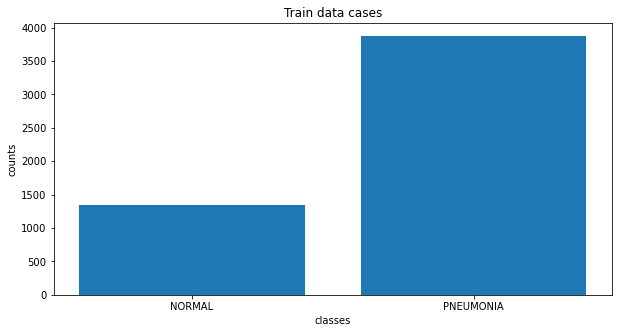

In [10]:
#plotting

plt.figure(figsize=(10,5))
x_axis = ['NORMAL', 'PNEUMONIA']
y_axis = [normal_train_img_count,pneumonia_train_img_count]
plt.bar(x_axis,y_axis)
plt.title("Train data cases")
plt.xlabel("classes")
plt.ylabel("counts")
plt.show()

In [11]:
#since normal class data is very less we shols assign class weight to it

class_zero=((normal_train_img_count+pneumonia_train_img_count)/normal_train_img_count)/2
class_one=((normal_train_img_count+pneumonia_train_img_count)/pneumonia_train_img_count)/2
class_weight={0:class_zero,1:class_one}
print("weight of class 0:{} \nweight of class 1:{}".format(class_weight[0],class_weight[1]))
        

weight of class 0:1.9448173005219984 
weight of class 1:0.6730322580645162


In [12]:
#Creating Model
model = Sequential([

        #Adding 5 Convolution Layers
        Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
        MaxPooling2D(2,2),

        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        #Flattenning the Pooled Parameters
        Flatten(),

        #Creating Fully Connected Networks of 512 Neurons followed by 128 Neurons
        Dense(512, activation='relu'),
        Dense(128, activation='relu'),


        #Final Prediction is Binary: NORMAL or PNEUMONIA, so using single output neuron with sigmoid funtion
        #to give output in 0-1 where 0 for NORMAL and 1 for PNEUMONIA
        Dense(1, activation='sigmoid')
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [13]:
#compiling model

model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy',keras.metrics.Precision(name='precision'),keras.metrics.Recall(name='recall')])

In [14]:
#training model


    
history = model.fit(train_data,steps_per_epoch = 64,epochs = 10,validation_data =test_data ,class_weight = class_weight)
model.save("./pred.h5")

Epoch 1/10
64/64 [==============================] - 19s 304ms/step - loss: 0.4675 - accuracy: 0.7393 - precision: 0.9029 - recall: 0.7273 - val_loss: 0.3718 - val_accuracy: 0.8429 - val_precision: 0.8244 - val_recall: 0.9513
Epoch 2/10
64/64 [==============================] - 20s 320ms/step - loss: 0.1964 - accuracy: 0.9165 - precision: 0.9729 - recall: 0.9138 - val_loss: 0.4472 - val_accuracy: 0.8077 - val_precision: 0.7778 - val_recall: 0.9692
Epoch 3/10
64/64 [==============================] - 19s 296ms/step - loss: 0.1529 - accuracy: 0.9375 - precision: 0.9815 - recall: 0.9341 - val_loss: 0.5088 - val_accuracy: 0.8077 - val_precision: 0.7722 - val_recall: 0.9821
Epoch 4/10
64/64 [==============================] - 19s 291ms/step - loss: 0.1238 - accuracy: 0.9551 - precision: 0.9860 - recall: 0.9541 - val_loss: 0.6741 - val_accuracy: 0.8029 - val_precision: 0.7654 - val_recall: 0.9872
Epoch 5/10
64/64 [==============================] - 19s 294ms/step - loss: 0.1309 - accuracy: 0.9453

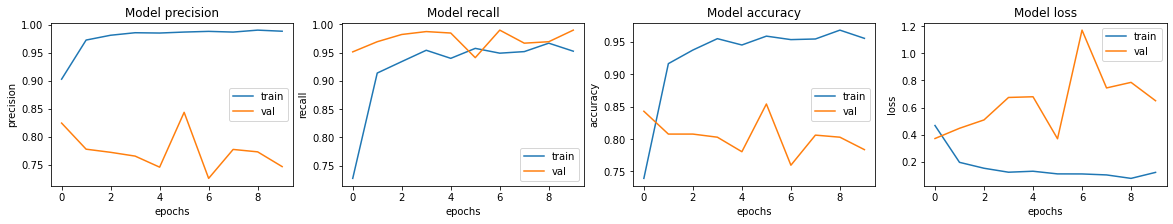

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(20,3))
ax = ax.ravel()

for i, met in enumerate(['precision','recall','accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [5]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import IPython.display as display

#This function will return the required tensor of the test image
def load_image(img_path):

    img = image.load_img(img_path, target_size=(300, 300))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
    return img_tensor

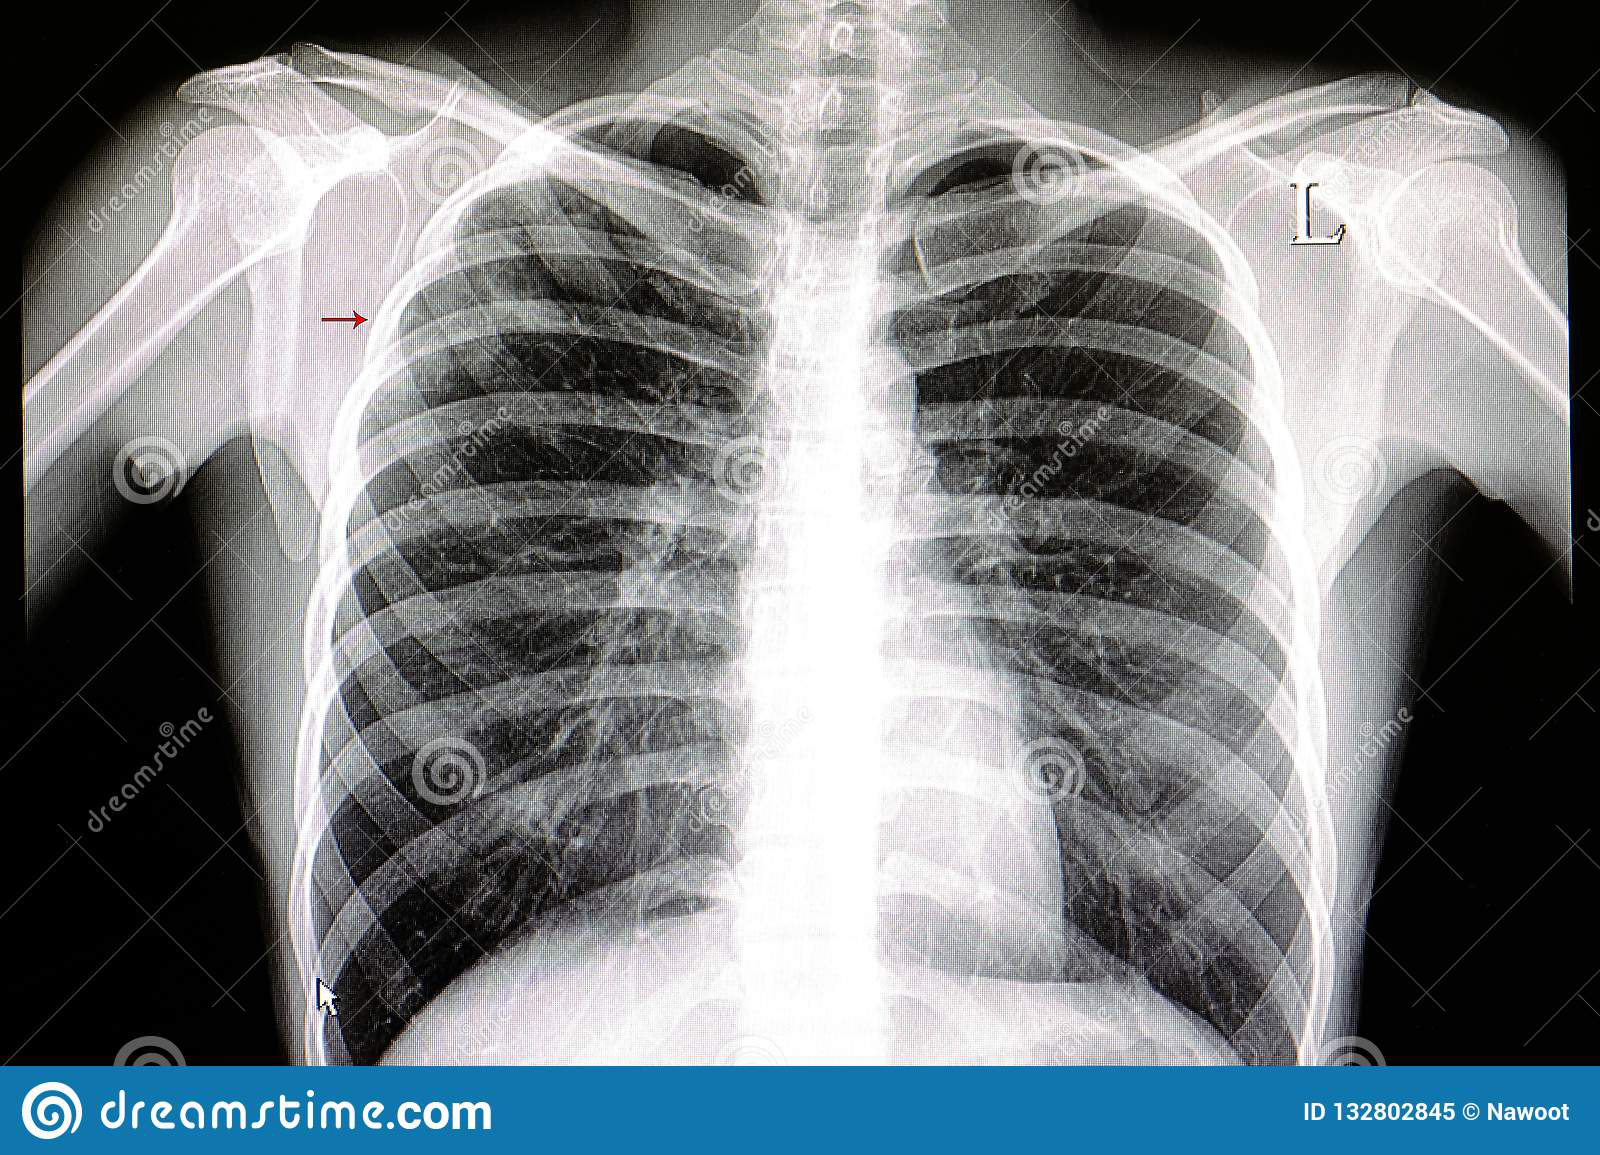

predicted class= Pneumonia


In [6]:
model = load_model("./pred.h5")
img_path = './test-img.jpg'
new_image = load_image(img_path)
pred = model.predict_classes(new_image)
class_out='Normal' if pred==[0]  else 'Pneumonia'
display.display(Image.open(img_path))
print('predicted class=',class_out)